In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# turn photo to array of pixels
train_datagen=ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, 
height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen=ImageDataGenerator(rescale=1.0/255.)

In [ ]:
train_data= train_datagen.flow_from_directory('/content/drive/MyDrive/skin_5/train',
                target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=False)
test_data= test_datagen.flow_from_directory('/content/drive/MyDrive/skin_5/val',
                target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=False)


Found 9203 images belonging to 5 classes.
Found 2303 images belonging to 5 classes.


In [ ]:
import keras
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt 
from keras.preprocessing import image
import PIL
from keras.callbacks import EarlyStopping
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import tensorflow as tf

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet201


In [ ]:
from keras import layers

In [ ]:
from tensorflow.keras.optimizers import RMSprop


In [ ]:
base_model = tf.keras.applications.ResNet50V2( include_top = False, weights = 'imagenet', input_shape=(224,224,3))
for layer in base_model.layers:
  layer.trainable = False
x = layers.Flatten()(base_model.output)
x = layers.Dropout(0.2)(x)
x = Dense(4096, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = Dense(4096, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = Dense(5, activation='softmax')(x)
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
288/288 [==============================] - 3320s 11s/step - loss: 1.6740 - accuracy: 0.6498 - val_loss: 0.5666 - val_accuracy: 0.7334
Epoch 2/10
288/288 [==============================] - 225s 782ms/step - loss: 0.6387 - accuracy: 0.7219 - val_loss: 0.6193 - val_accuracy: 0.7147
Epoch 3/10
288/288 [==============================] - 219s 760ms/step - loss: 0.5705 - accuracy: 0.7491 - val_loss: 0.4861 - val_accuracy: 0.7746
Epoch 4/10
288/288 [==============================] - 220s 764ms/step - loss: 0.5549 - accuracy: 0.7538 - val_loss: 0.5522 - val_accuracy: 0.7490
Epoch 5/10
288/288 [==============================] - 215s 747ms/step - loss: 0.5436 - accuracy: 0.7594 - val_loss: 0.4255 - val_accuracy: 0.8116
Epoch 6/10
288/288 [==============================] - 216s 748ms/step - loss: 0.5110 - accuracy: 0.7759 - val_loss: 0.4419 - val_accuracy: 0.7972
Epoch 7/10
288/288 [==============================] - 211s 732ms/step - loss: 0.4823 - accuracy: 0.7874 - val_loss: 0.4605 - 

In [ ]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
288/288 [==============================] - 230s 798ms/step - loss: 0.5095 - accuracy: 0.7867 - val_loss: 0.4932 - val_accuracy: 0.7686
Epoch 2/10
288/288 [==============================] - 221s 767ms/step - loss: 0.4862 - accuracy: 0.7844 - val_loss: 0.4265 - val_accuracy: 0.8094
Epoch 3/10
288/288 [==============================] - 220s 764ms/step - loss: 0.4659 - accuracy: 0.8019 - val_loss: 0.4856 - val_accuracy: 0.7911
Epoch 4/10
288/288 [==============================] - 215s 746ms/step - loss: 0.4578 - accuracy: 0.7970 - val_loss: 0.4065 - val_accuracy: 0.8163
Epoch 5/10
288/288 [==============================] - 218s 755ms/step - loss: 0.4493 - accuracy: 0.7976 - val_loss: 0.4455 - val_accuracy: 0.8116
Epoch 6/10
288/288 [==============================] - 212s 736ms/step - loss: 0.4355 - accuracy: 0.8108 - val_loss: 0.4068 - val_accuracy: 0.8224
Epoch 7/10
288/288 [==============================] - 211s 734ms/step - loss: 0.4305 - accuracy: 0.8131 - val_loss: 0.4318 -

In [ ]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
288/288 [==============================] - 218s 757ms/step - loss: 0.4425 - accuracy: 0.8070 - val_loss: 0.4160 - val_accuracy: 0.8068
Epoch 2/10
288/288 [==============================] - 217s 754ms/step - loss: 0.4486 - accuracy: 0.8040 - val_loss: 0.5194 - val_accuracy: 0.7759
Epoch 3/10
288/288 [==============================] - 214s 744ms/step - loss: 0.4306 - accuracy: 0.8133 - val_loss: 0.3846 - val_accuracy: 0.8328
Epoch 4/10
288/288 [==============================] - 215s 746ms/step - loss: 0.4240 - accuracy: 0.8122 - val_loss: 0.4275 - val_accuracy: 0.8163
Epoch 5/10
288/288 [==============================] - 212s 736ms/step - loss: 0.4242 - accuracy: 0.8170 - val_loss: 0.4140 - val_accuracy: 0.8111
Epoch 6/10
288/288 [==============================] - 213s 739ms/step - loss: 0.4075 - accuracy: 0.8223 - val_loss: 0.4304 - val_accuracy: 0.8072


In [ ]:
results=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True))

Epoch 1/10
288/288 [==============================] - 229s 794ms/step - loss: 0.4062 - accuracy: 0.8228 - val_loss: 0.4014 - val_accuracy: 0.8215
Epoch 2/10
288/288 [==============================] - 225s 780ms/step - loss: 0.4322 - accuracy: 0.8096 - val_loss: 0.4174 - val_accuracy: 0.8202
Epoch 3/10
288/288 [==============================] - 220s 765ms/step - loss: 0.4029 - accuracy: 0.8256 - val_loss: 0.3776 - val_accuracy: 0.8389
Epoch 4/10
288/288 [==============================] - 224s 777ms/step - loss: 0.3904 - accuracy: 0.8318 - val_loss: 0.3823 - val_accuracy: 0.8372
Epoch 5/10
288/288 [==============================] - 214s 743ms/step - loss: 0.3704 - accuracy: 0.8409 - val_loss: 0.4215 - val_accuracy: 0.8185
Epoch 6/10
288/288 [==============================] - 214s 743ms/step - loss: 0.3699 - accuracy: 0.8417 - val_loss: 0.4724 - val_accuracy: 0.8120


In [ ]:
model.save('/content/drive/MyDrive/ResNet50V2._83.89%.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print('test loss :{}   test accuracy :{}'.format(test_loss,test_acc))

72/72 [==============================] - 25s 352ms/step - loss: 0.3776 - accuracy: 0.8389
test loss :0.37763628363609314   test accuracy :0.8389057517051697


Text(0.5, 0, 'epoch')

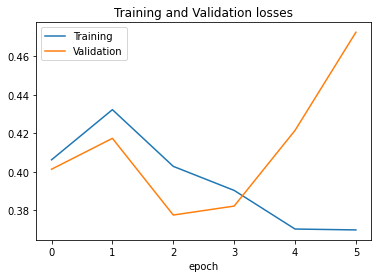

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

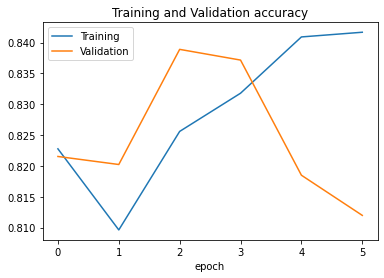

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')